In [2]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
import seaborn as sns
sns.set_context("talk")

dj.blob.use_32bit_dims = True  # necessary for pd.blob read

import behav_viz.ingest as ingest
import behav_viz.visualize as viz
import behav_viz.utils as utils

FIGURES_PATH = utils.dir_utils.get_figures_path("rats", "cohort3")

# settings
%load_ext autoreload
%autoreload 2

[2024-07-22 14:44:42,030][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-07-22 14:44:43,834][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [4]:
# ANIMALS
ANIMAL_IDS = [
    "R030",
    "R031",
    "R032",
    "R034",
    "R035",
    "R036",
    "R037",
    "R038",
]
mode = "today"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = utils.dj_utils.return_date_window(
    latest_date=latest_date, n_days_back=20
)

In [5]:
# LOAD IN TRIALS DATA
trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min
)

Fetched 15 dates from Sessions table from 2024-07-02 to 2024-07-21 for R030

Fetched 15 dates from Sessions table from 2024-07-02 to 2024-07-21 for R031

Fetched 15 dates from Sessions table from 2024-07-02 to 2024-07-21 for R032

Fetched 14 dates from Sessions table from 2024-07-02 to 2024-07-21 for R034

Fetched 15 dates from Sessions table from 2024-07-02 to 2024-07-21 for R035

Fetched 15 dates from Sessions table from 2024-07-02 to 2024-07-21 for R036

Fetched 15 dates from Sessions table from 2024-07-02 to 2024-07-21 for R037

no sessions found for R038 between 2024-07-02 and 2030-01-01


In [6]:
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max, verbose=True
)

Fetched data from SessionAggDate table from 2024-07-02 to 2024-07-21  
	Last date on the database is 2024-07-21 but user is querying data 
	for 2024-07-22. Attempting to manually aggregate today's data.
No new data from today, 2024-07-22 to add to SessionAggDate.

104 daily summaries fetched for animals: 
['R030', 'R031', 'R032', 'R034', 'R035', 'R036', 'R037', 'R038']
between 2024-07-02 and 2024-07-21


/Users/jessbreda/Desktop/github/jbreda_animal_training/src/behav_viz/visualize/plot_days_info.py:1323: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="lower left", title="Block Type")


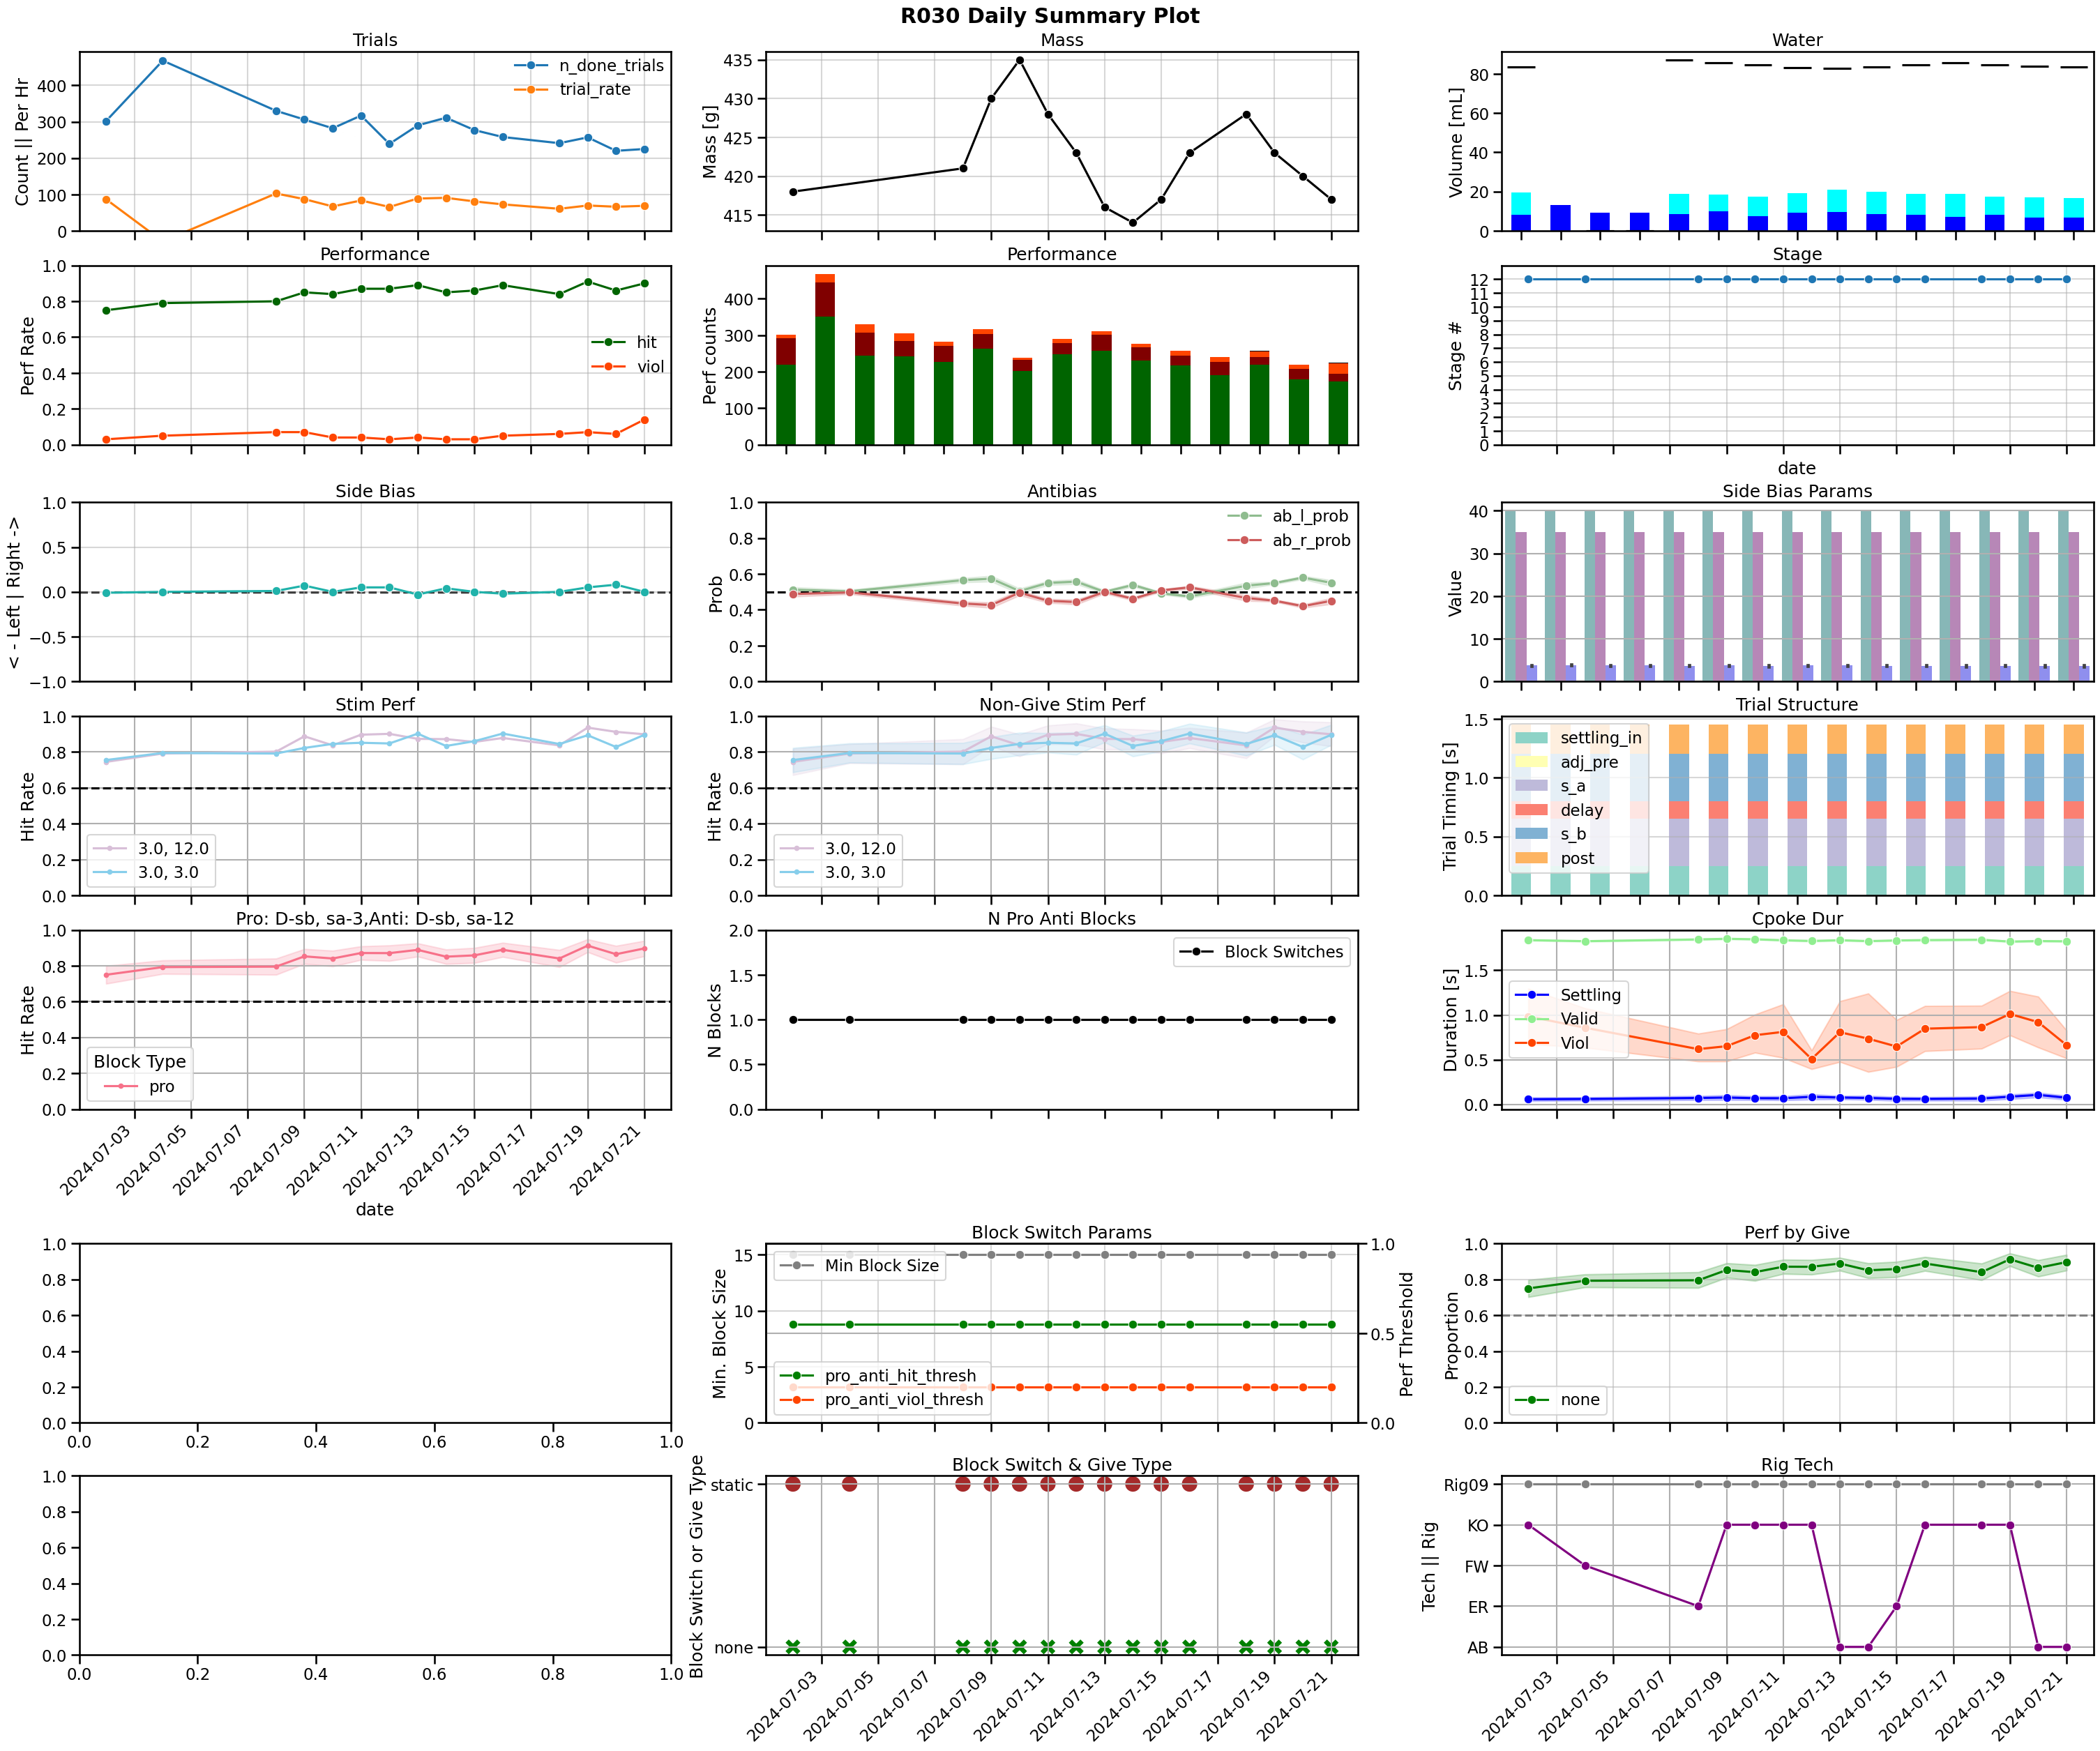

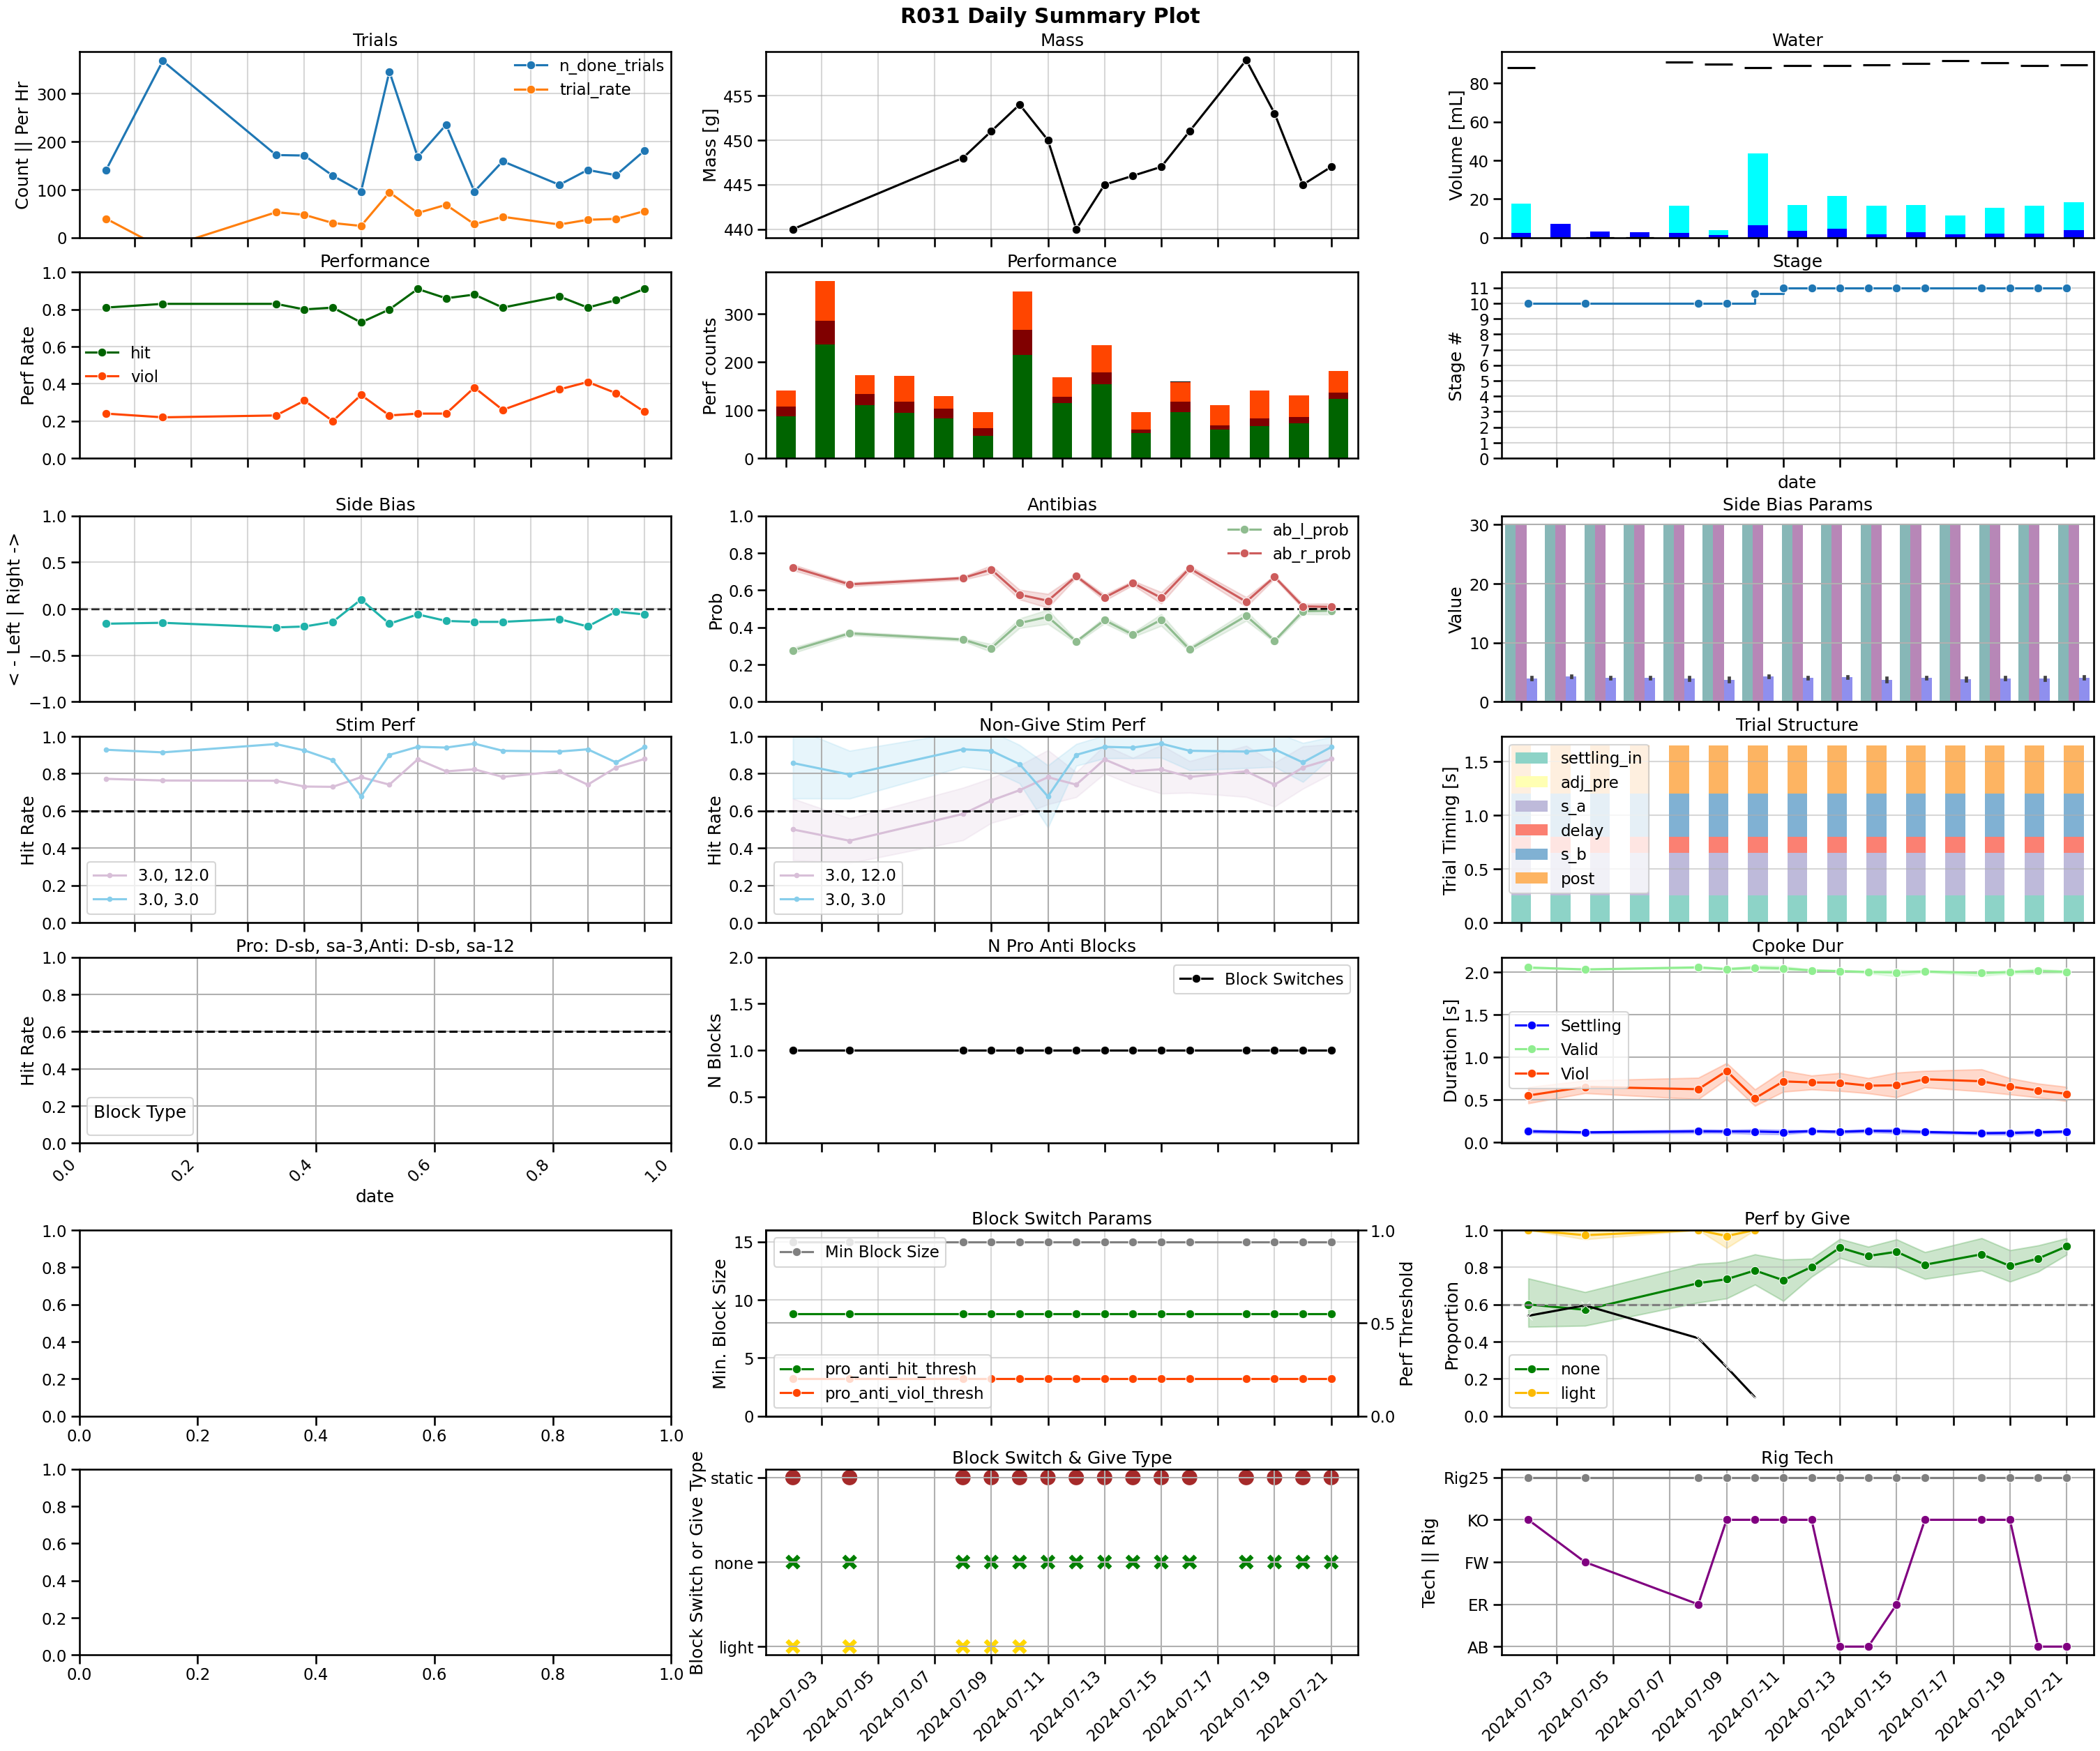

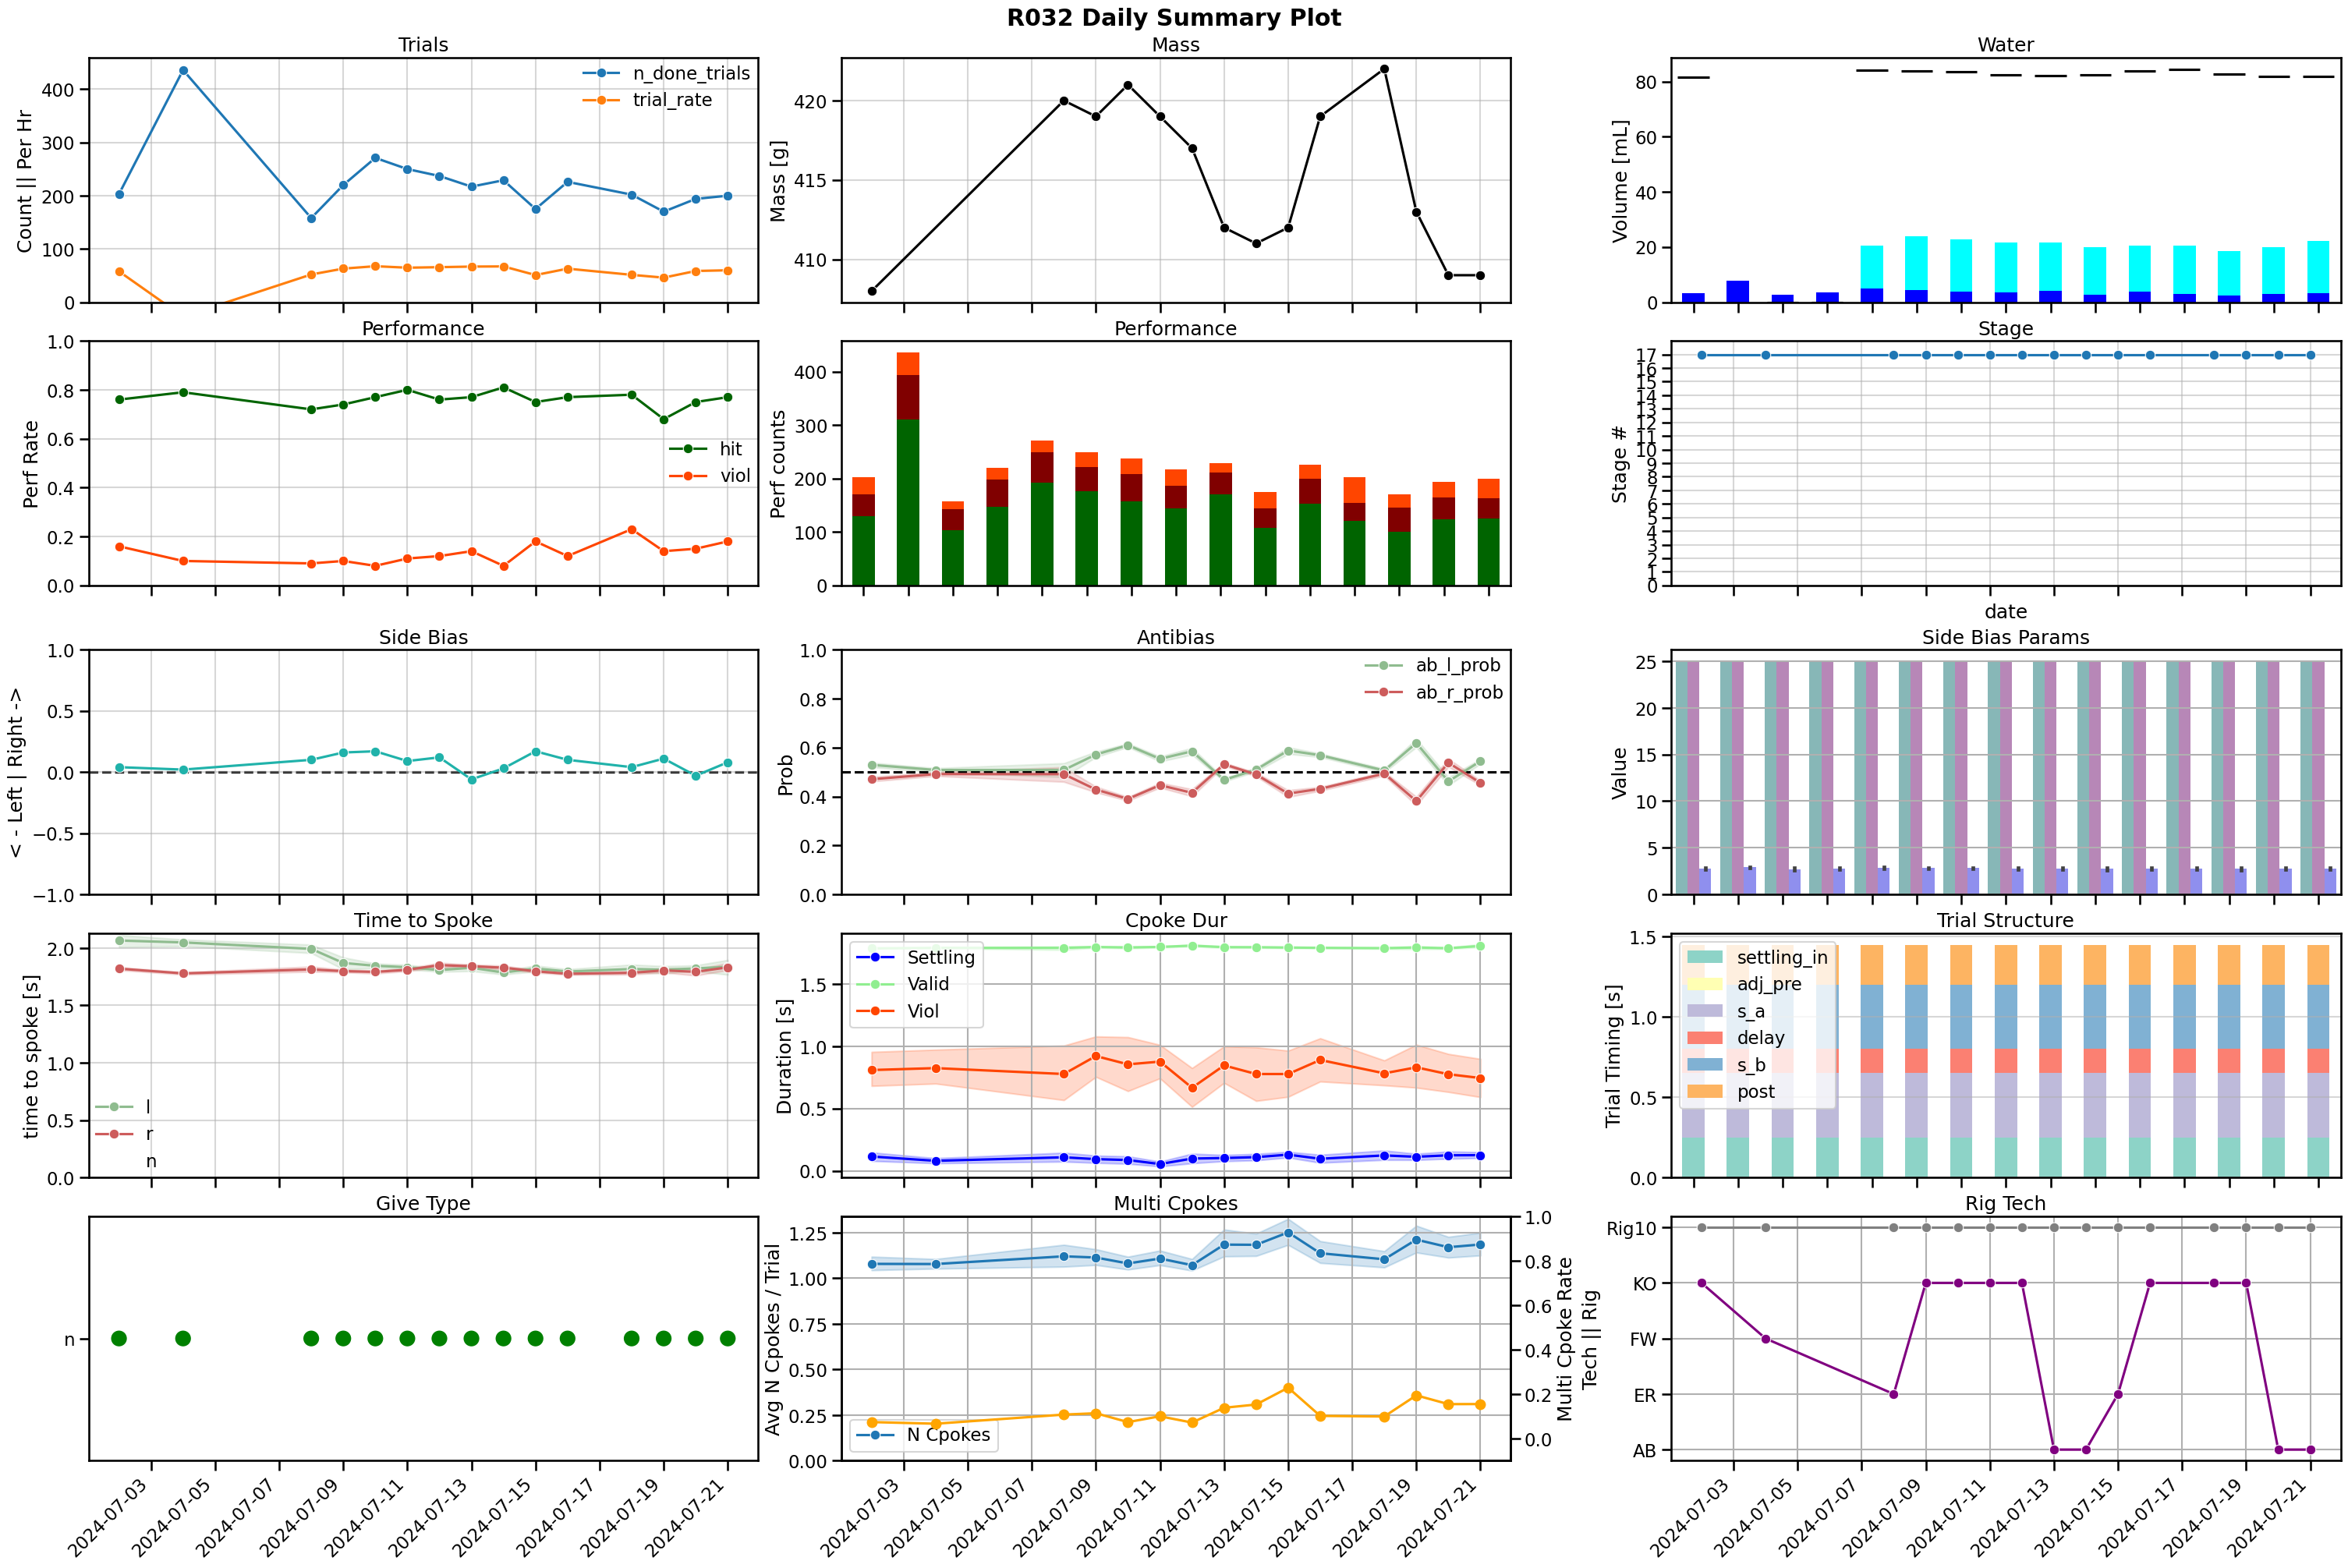

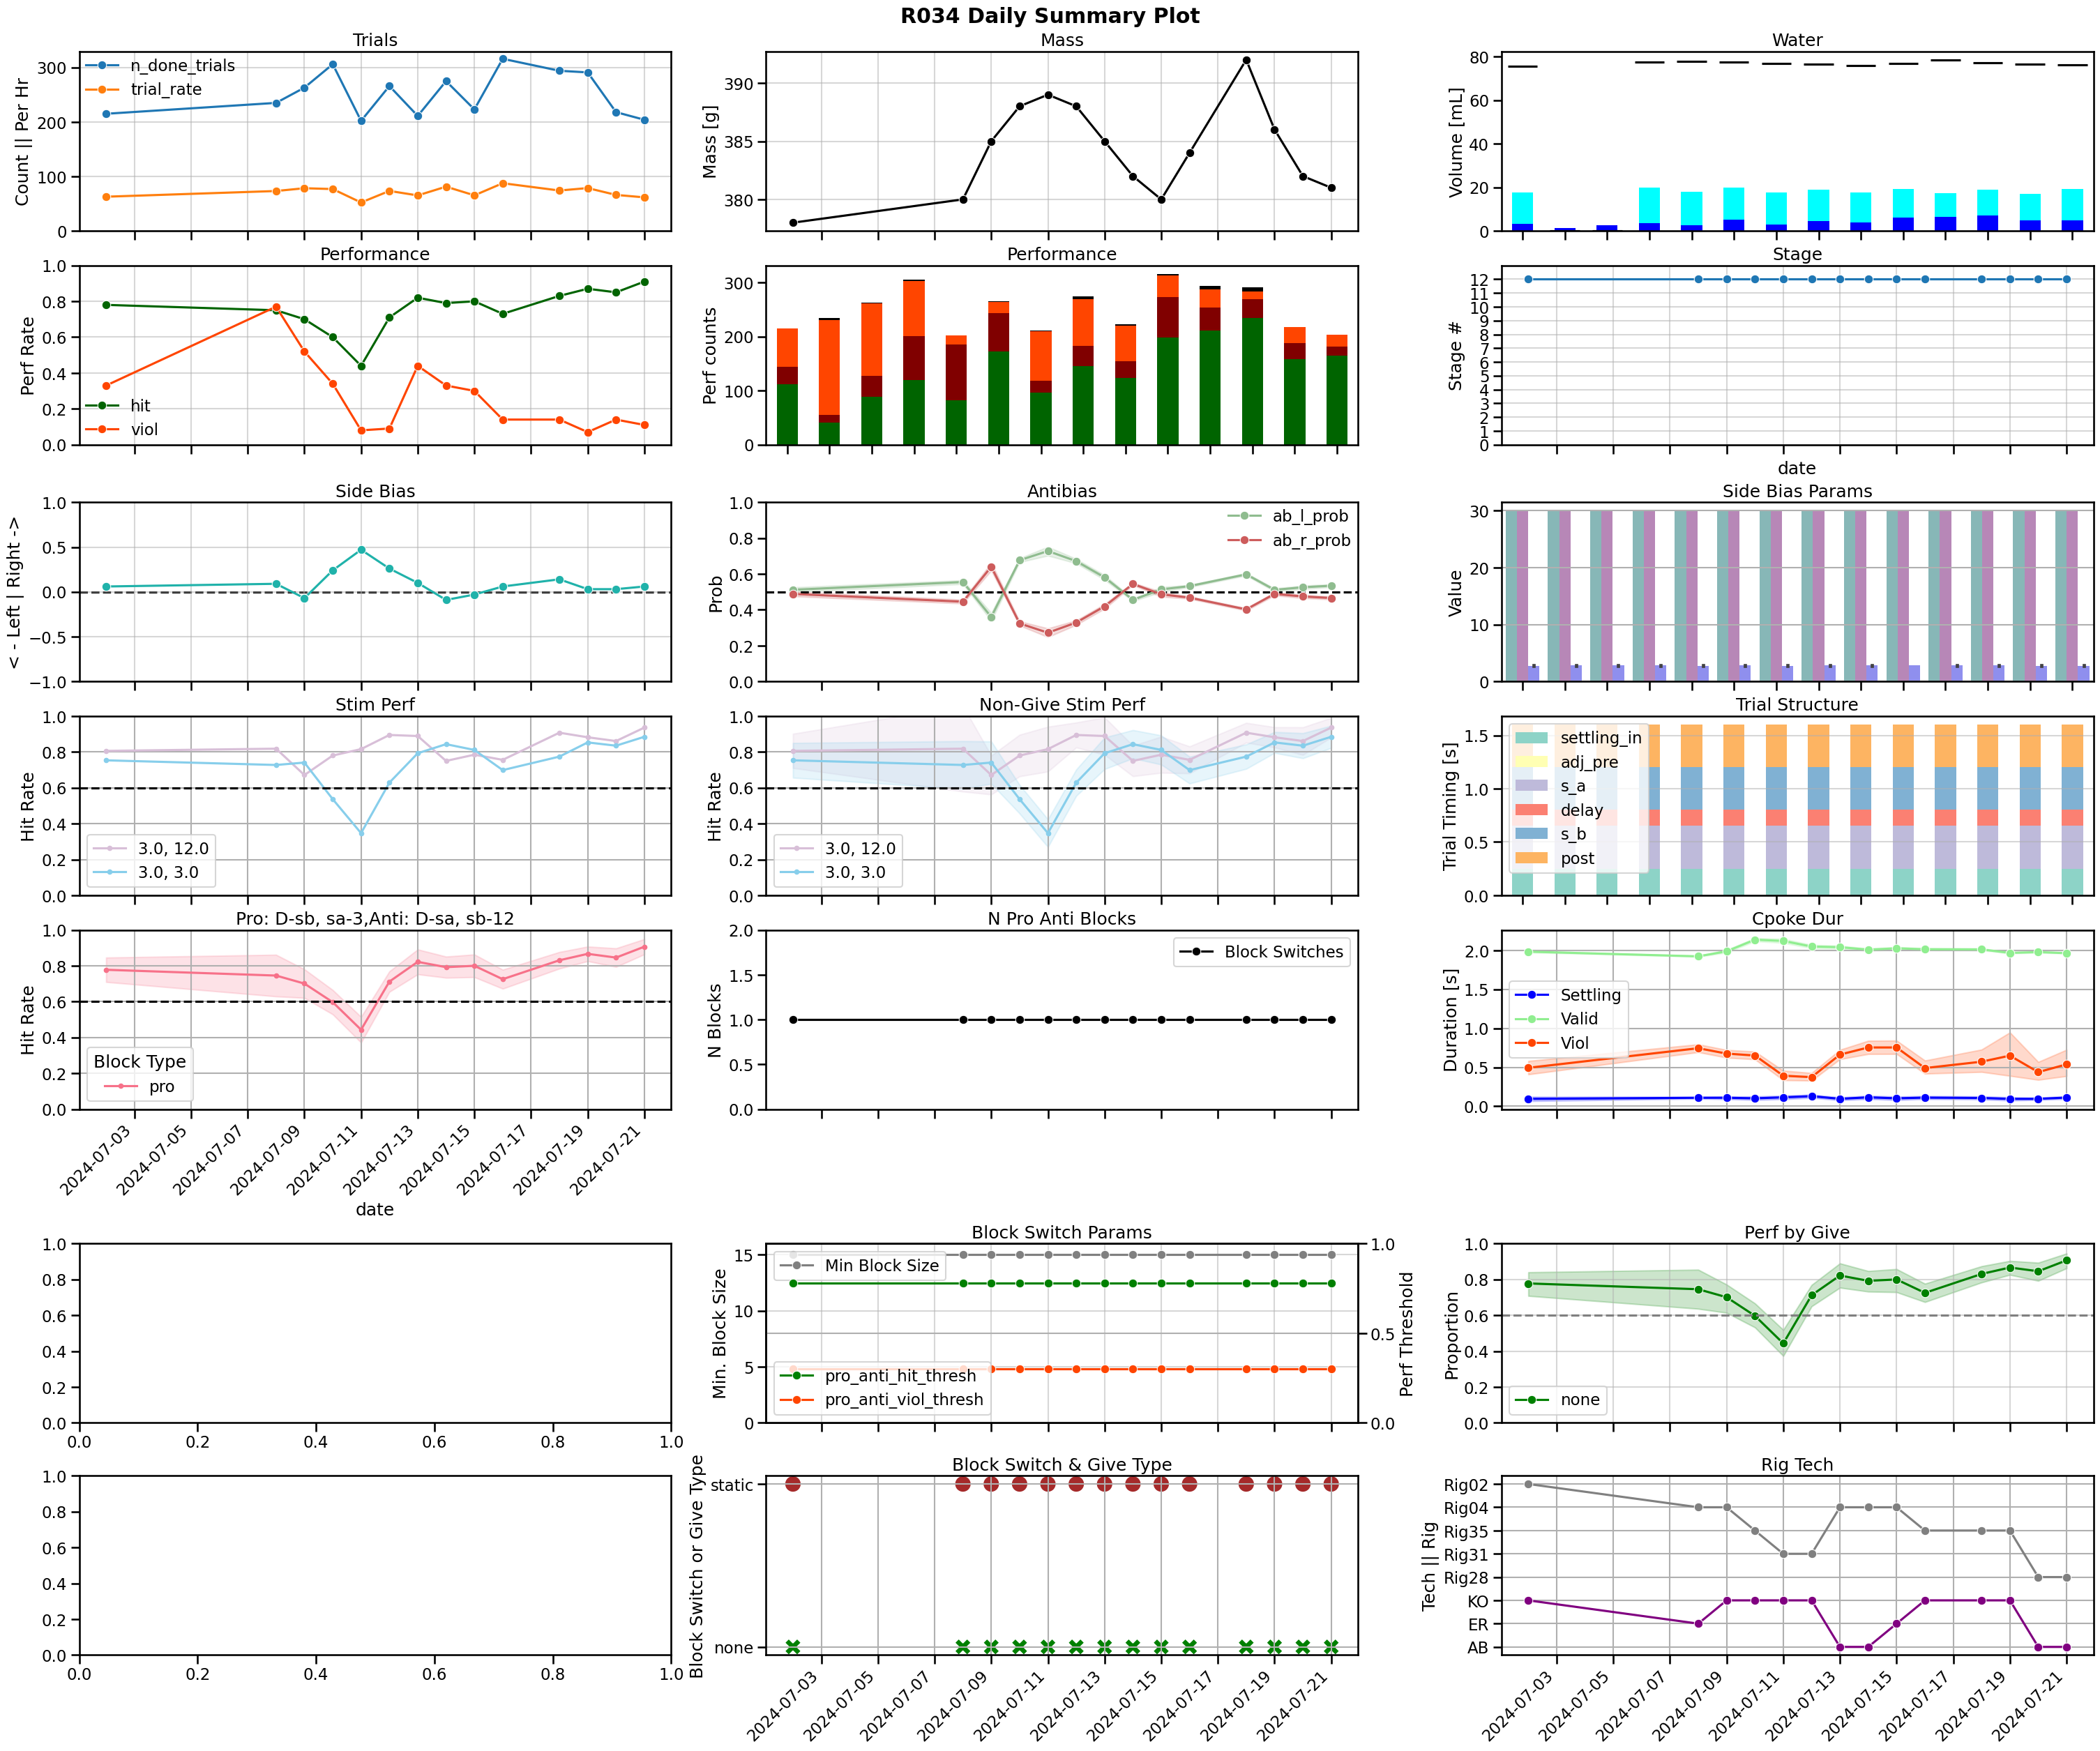

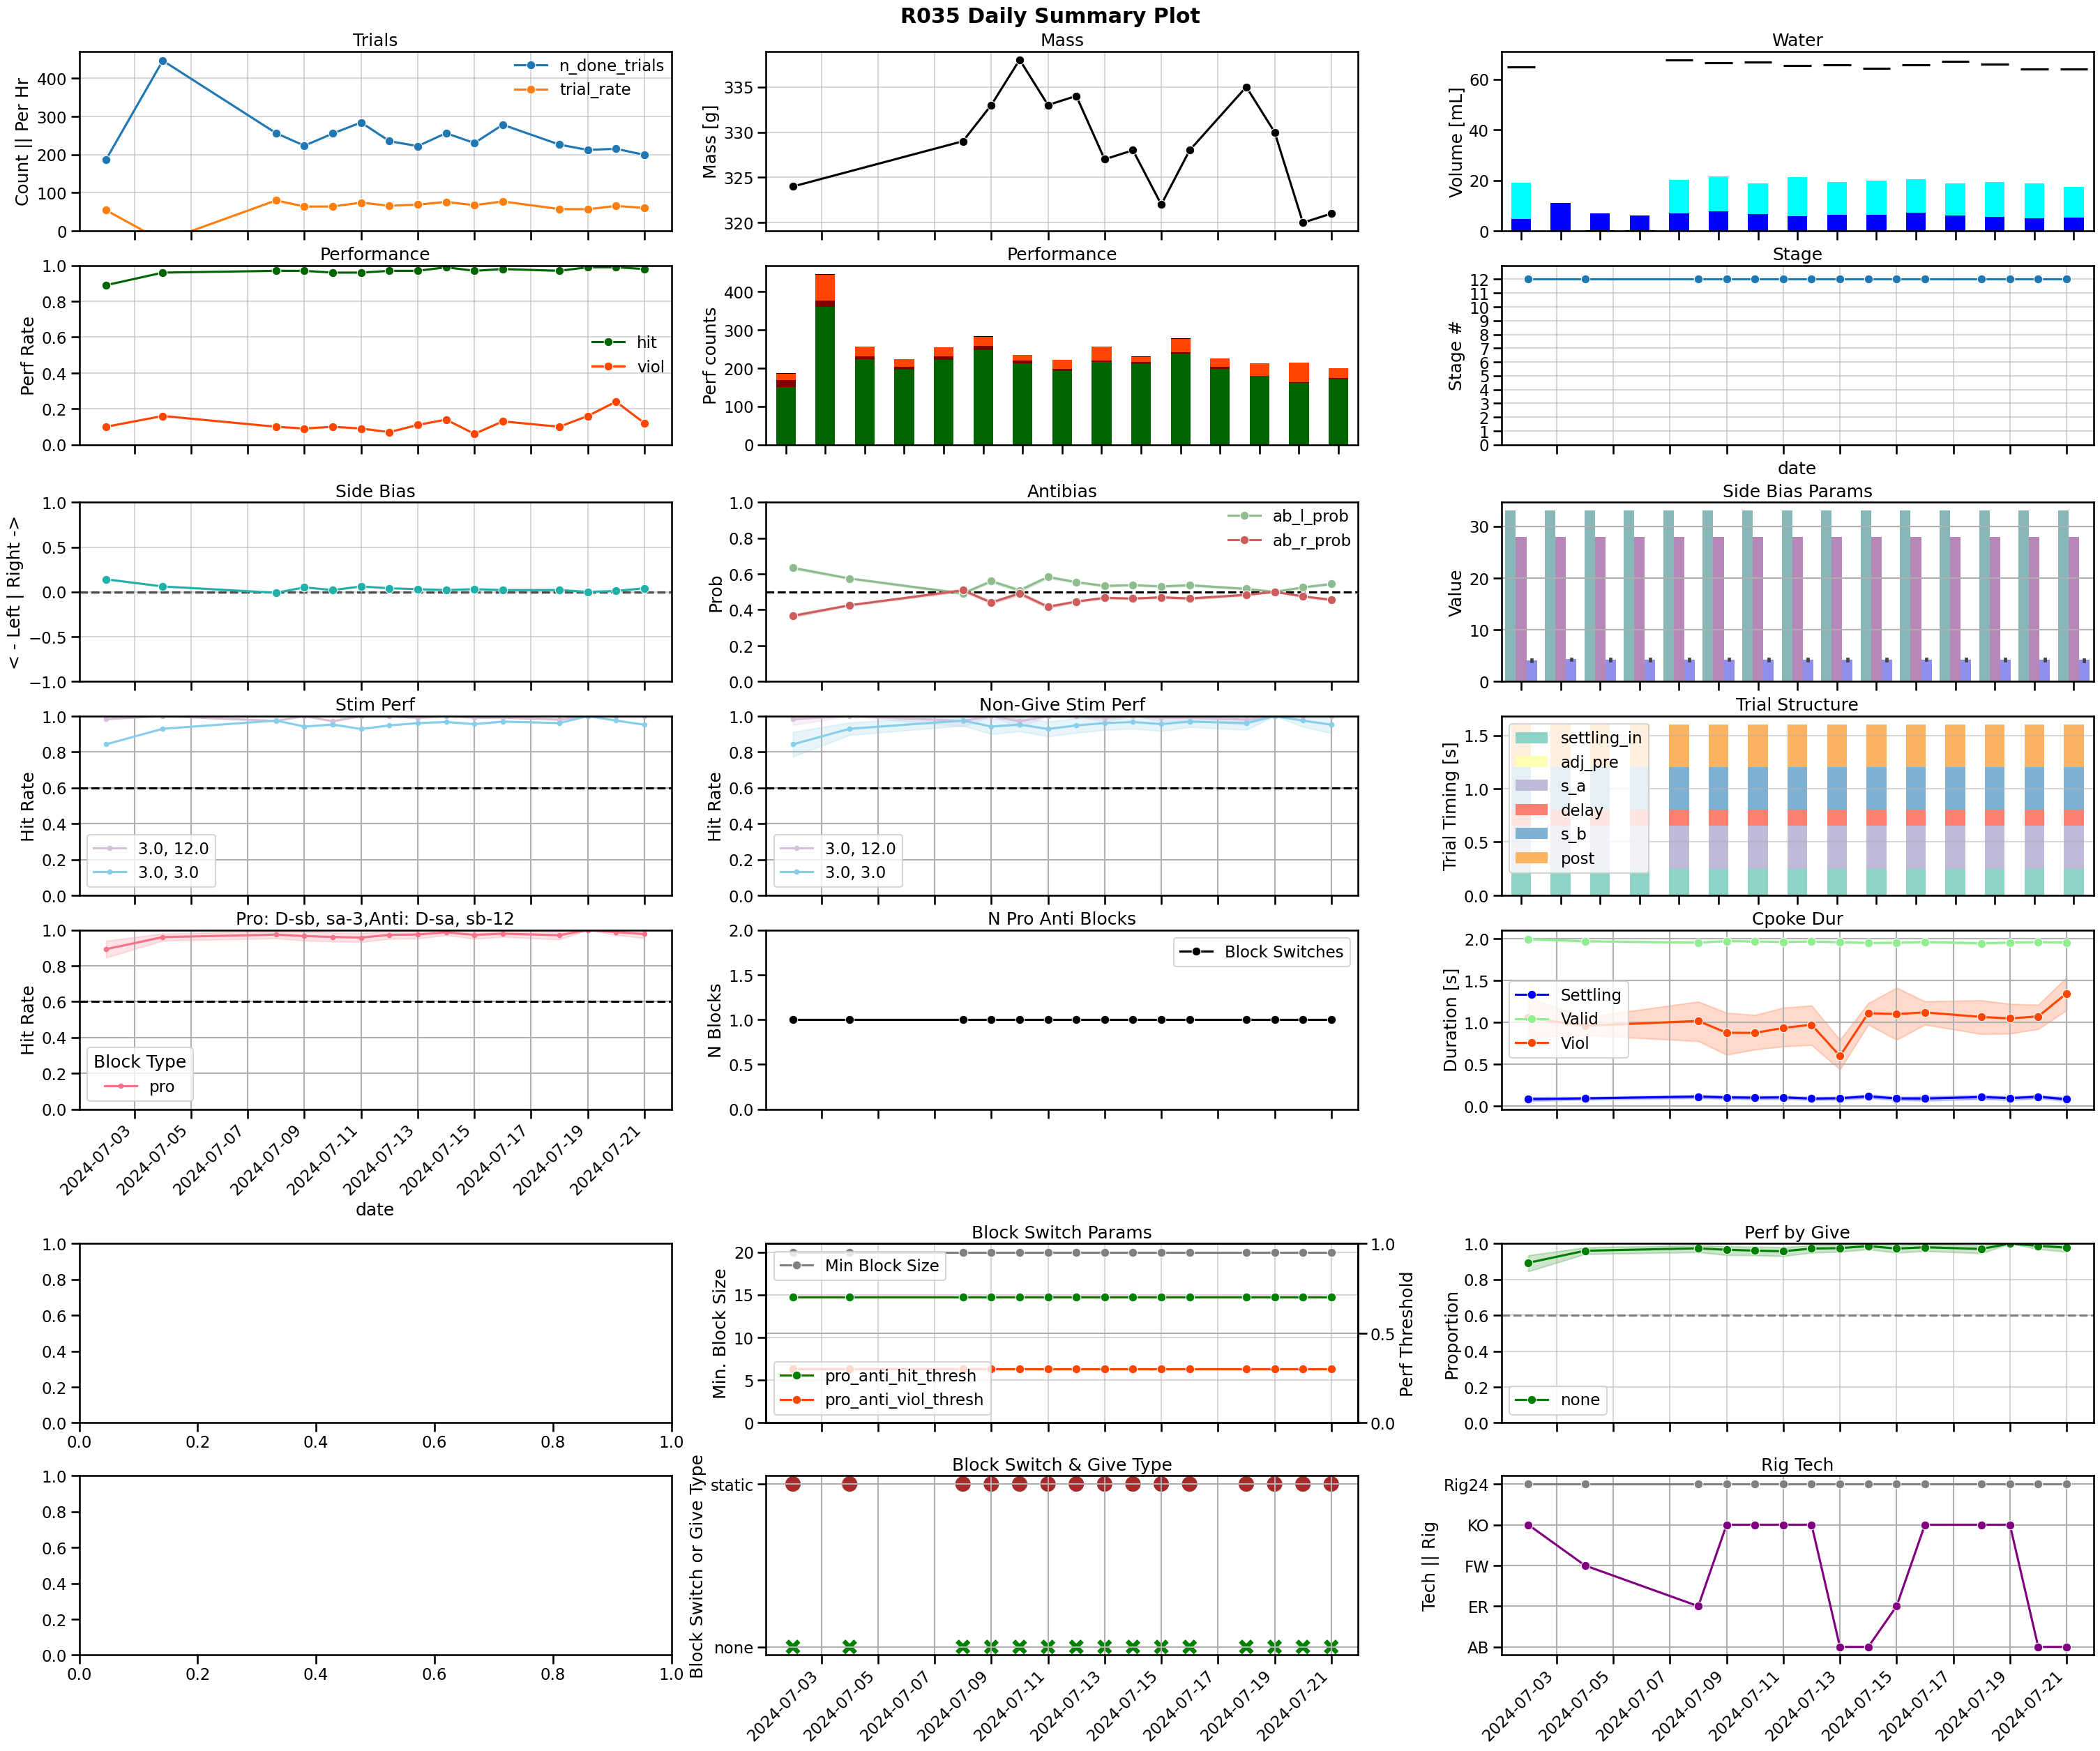

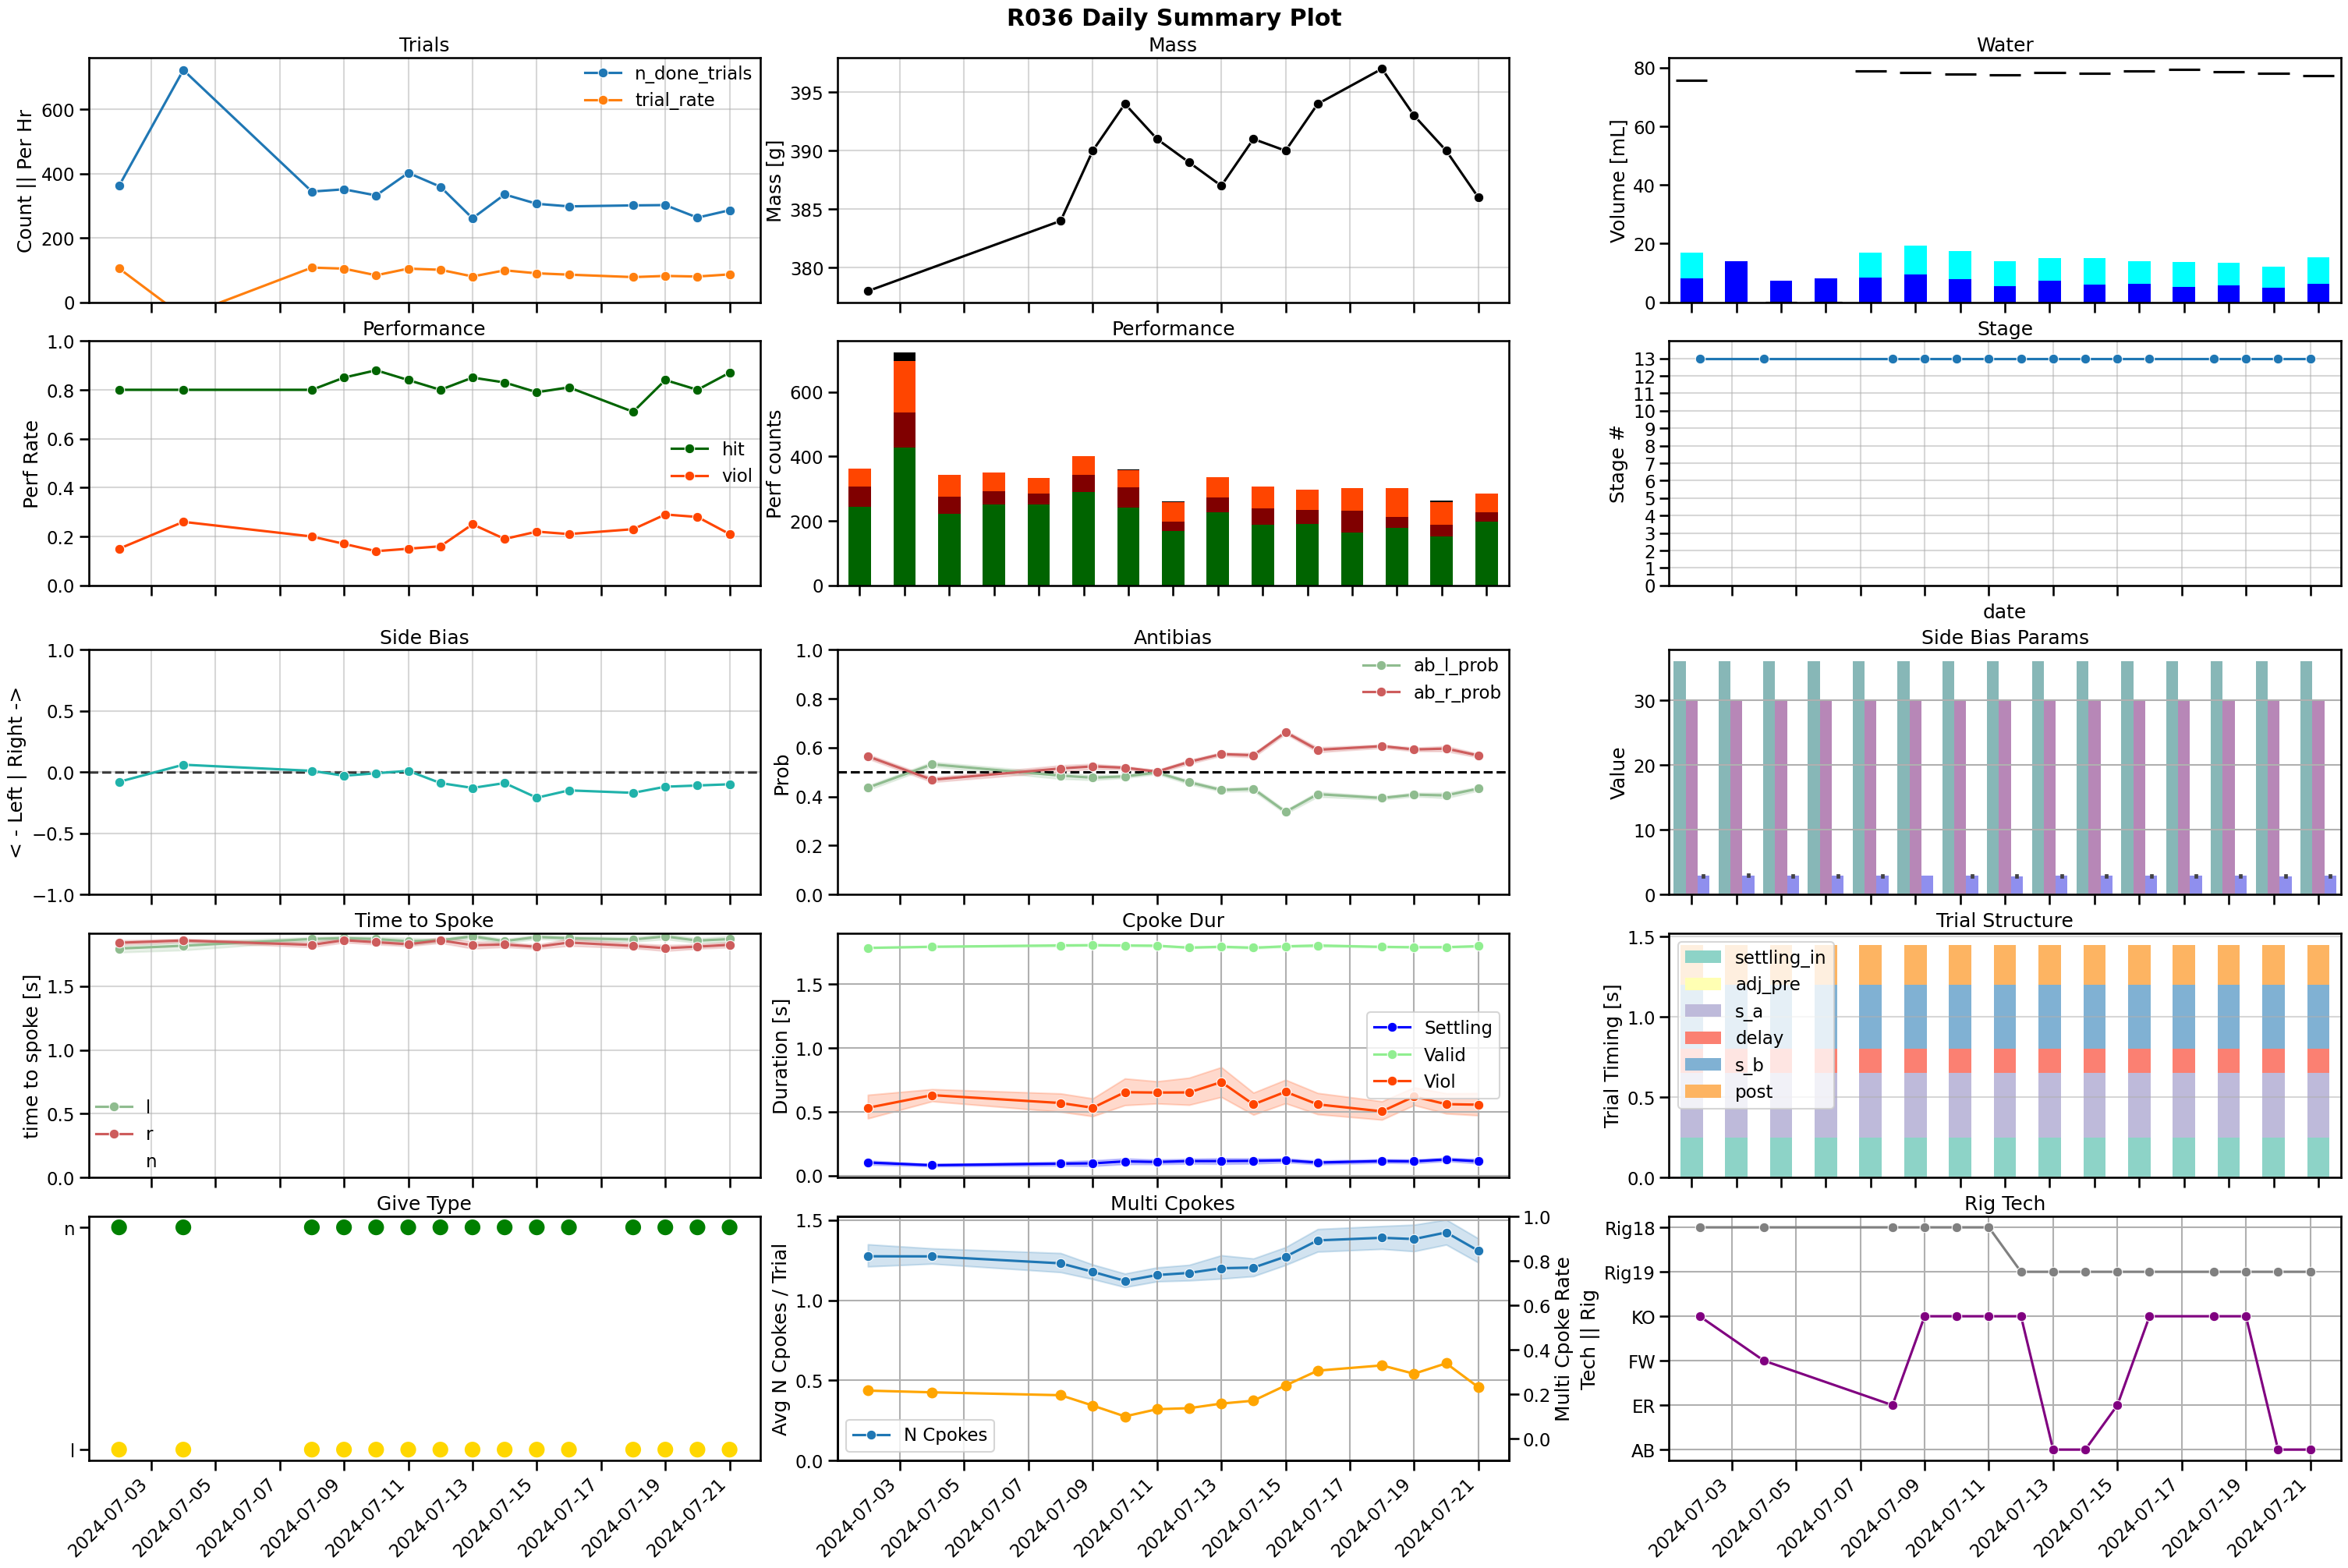

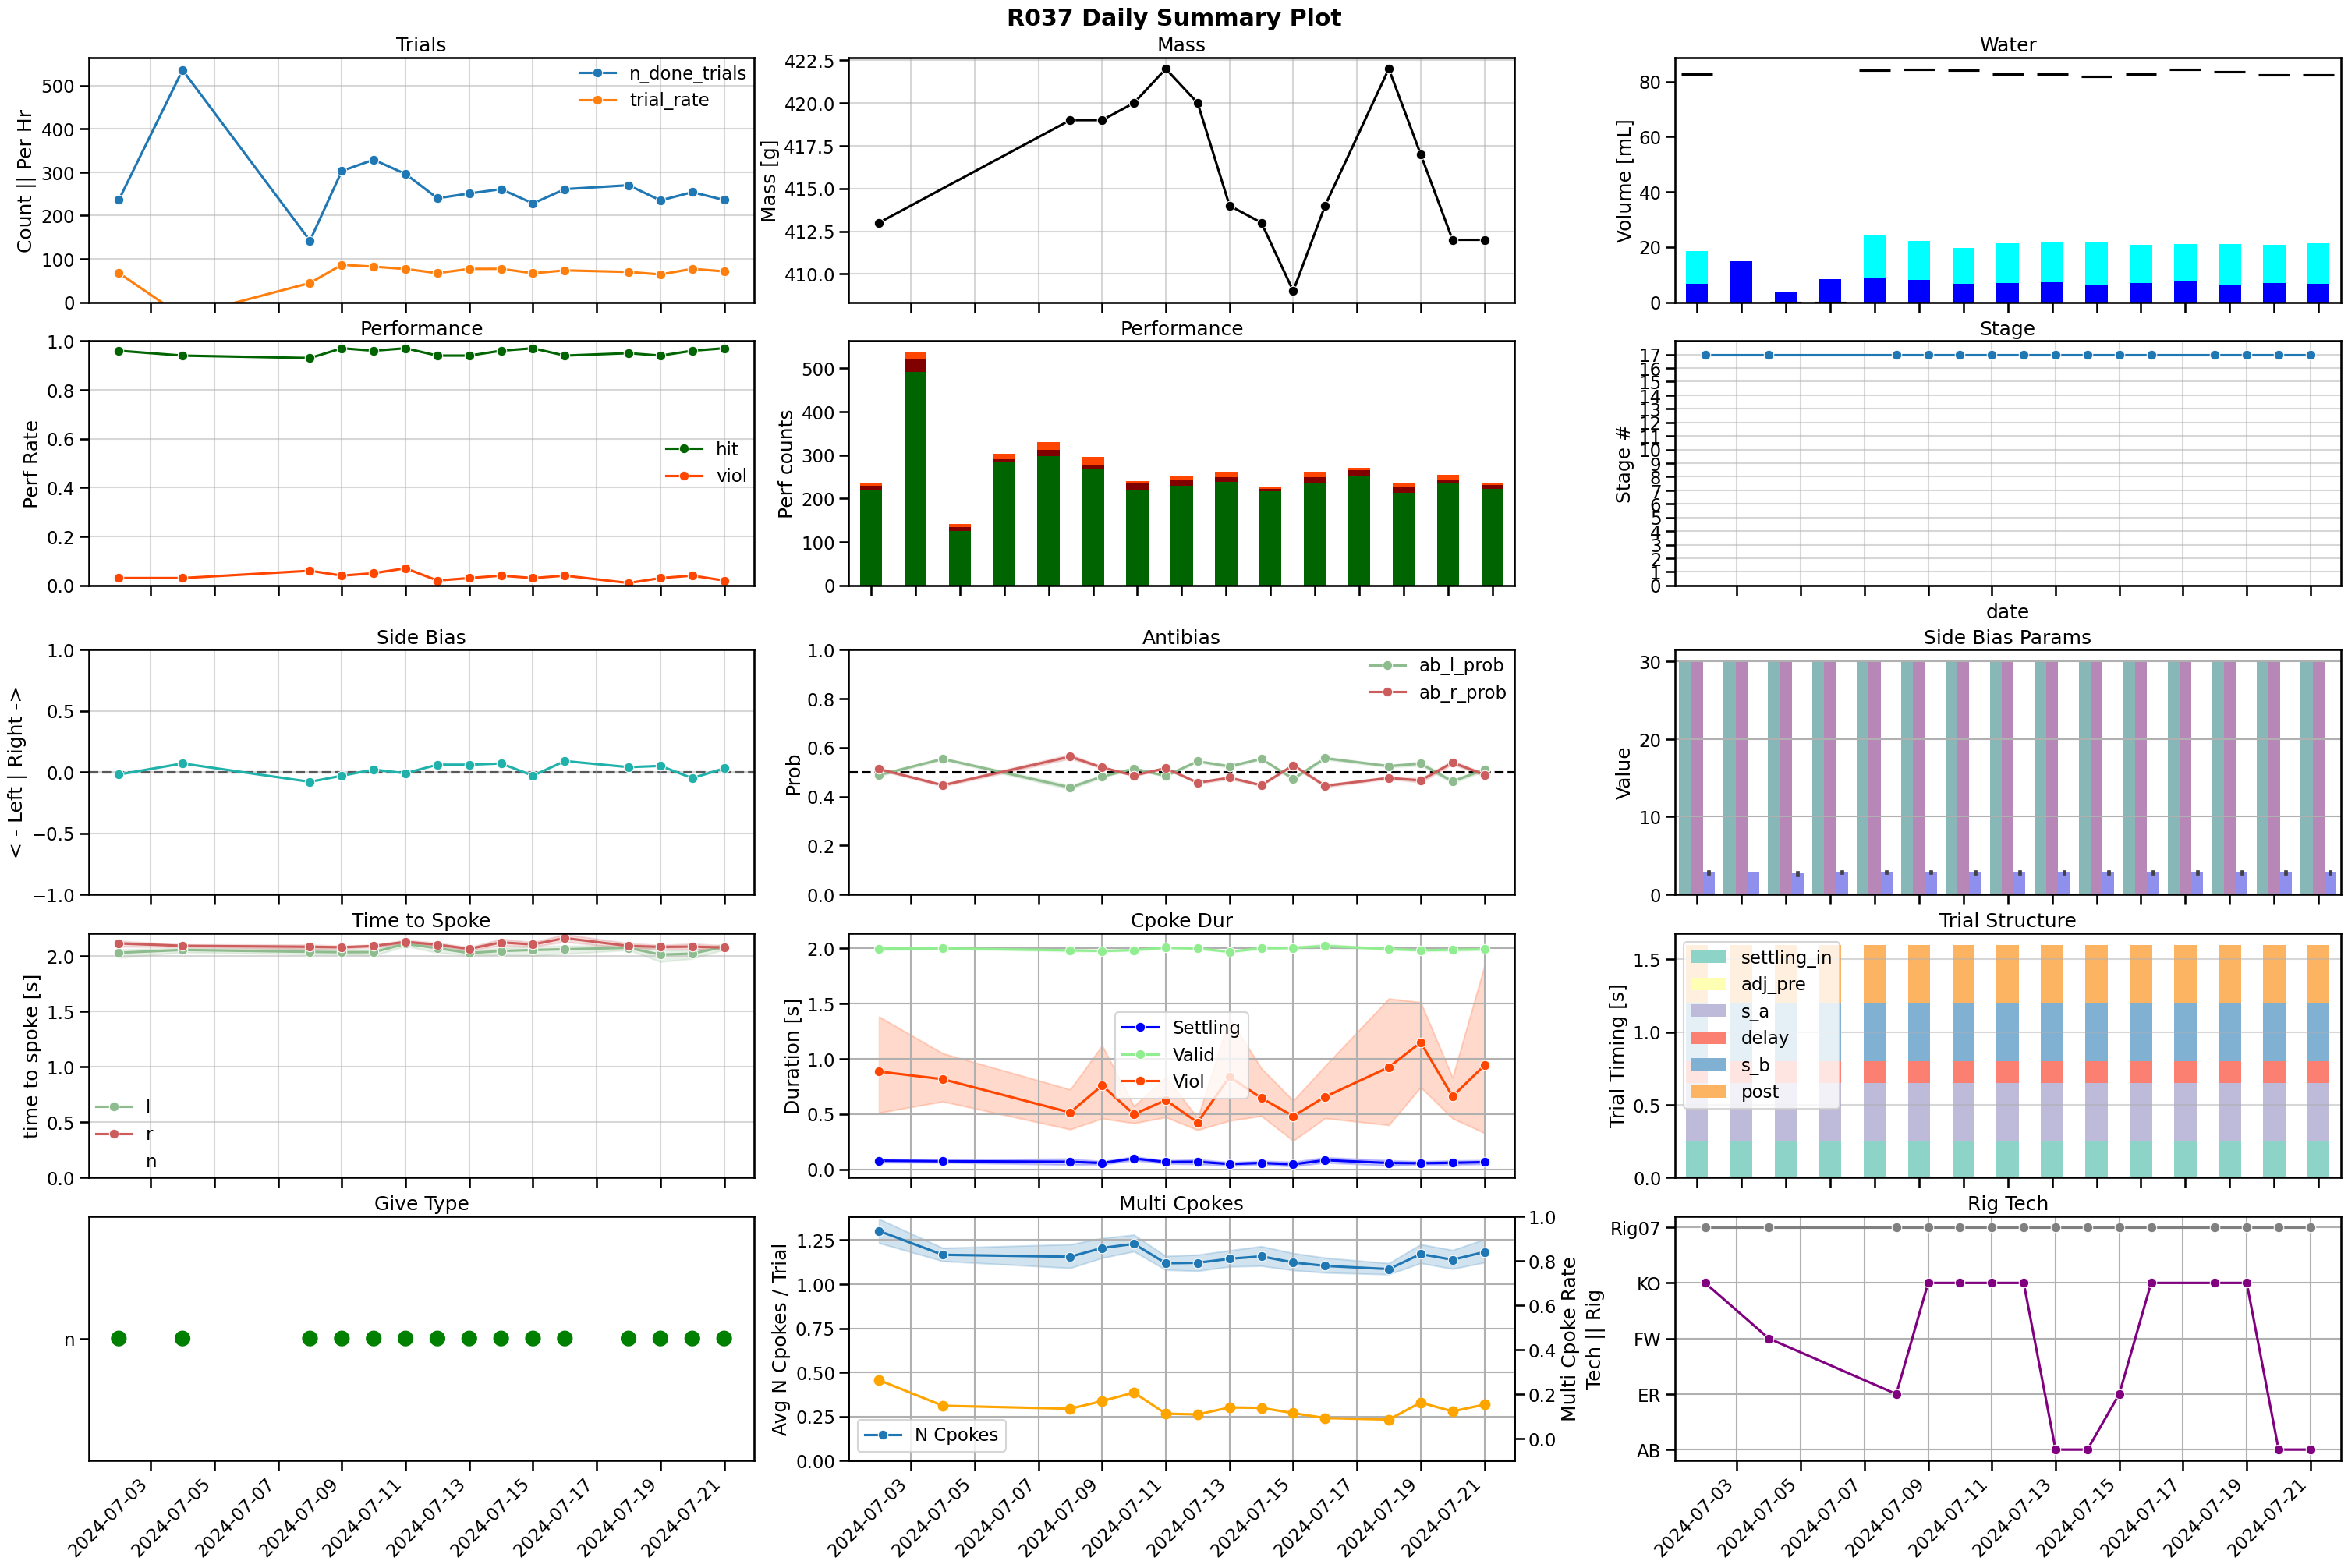

In [7]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    try:
        viz.summarize.over_days_summaries(
            animal_id, animal_days_df, animal_trials_df.reset_index()
        )
    except Exception as e:
        print(e)
        print(f"Failed to plot {animal_id}")
        continue

In [8]:
# PLOT TRIALS DATA
viz.summarize.single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R030_2024-07-02_day_summary
['s_a', 'delay', 's_b', 'go']
skipping anti give del metrics
making R031_2024-07-02_day_summary
['s_a', 'delay', 's_b', 'post']
making R032_2024-07-02_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R034_2024-07-02_day_summary
['s_a', 'delay', 's_b']
skipping anti give del metrics
making R035_2024-07-02_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
skipping anti give del metrics
making R036_2024-07-02_day_summary
['s_a', 'delay', 's_b', 'go']
making R037_2024-07-02_day_summary
['s_a', 's_b', 'go']
making R030_2024-07-04_day_summary
['s_a', 's_b', 'go']
skipping anti give del metrics


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making R031_2024-07-04_day_summary
['s_a', 'delay', 's_b', 'post', 'go']


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making R032_2024-07-04_day_summary
['s_a', 'delay', 's_b', 'post', 'go']


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making R035_2024-07-04_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
skipping anti give del metrics


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making R036_2024-07-04_day_summary
['s_a', 'delay', 's_b', 'post', 'go']


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making R037_2024-07-04_day_summary
['s_a', 's_b', 'post', 'go']


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making R030_2024-07-08_day_summary
['s_a', 'delay', 's_b', 'go']
skipping anti give del metrics
making R031_2024-07-08_day_summary
['s_a', 's_b', 'go']
making R032_2024-07-08_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R034_2024-07-08_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
skipping anti give del metrics
making R035_2024-07-08_day_summary
['adj_pre', 's_a', 's_b', 'post', 'go']
skipping anti give del metrics
making R036_2024-07-08_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R037_2024-07-08_day_summary
['s_a', 's_b']
making R030_2024-07-09_day_summary
['s_a', 'delay', 'go']
skipping anti give del metrics
making R031_2024-07-09_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R032_2024-07-09_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R034_2024-07-09_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
skipping anti give del metrics
making R035_2024-07-09_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
skipping anti give del metrics